In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('data3.txt', header = None)
data.head()

,0,1
0,1.225,2.7
1,4.125,5.1
2,6.375,8.6
3,10.475,11.3
4,13.475,13.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
0    195 non-null float64
1    195 non-null float64
dtypes: float64(2)
memory usage: 3.1 KB


In [4]:
data.tail()

,0,1
190,31.275,11.20
191,30.675,14.65
192,29.875,15.65
193,31.425,13.40
194,32.175,12.35


In [5]:
data.describe()

,0,1
count,195.000000,195.000000
mean,20.072692,10.125128
std,10.234654,5.643750
min,0.225000,0.650000
25%,11.375000,5.000000
50%,22.925000,10.050000
75%,29.575000,15.475000
max,32.375000,18.800000


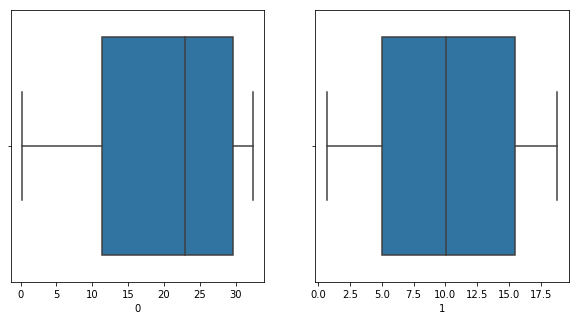

In [6]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sb.boxplot(data.iloc[:,0])
plt.subplot(1,2,2)
sb.boxplot(data.iloc[:,1])
plt.show()

** Nhận xét đầu tiên về bộ dữ liệu. Bộ dữ liệu không bị thiếu ô nào cả. Về range của dữ liệu cũng tương đối giống nhau, không có outliers trên 2 cột

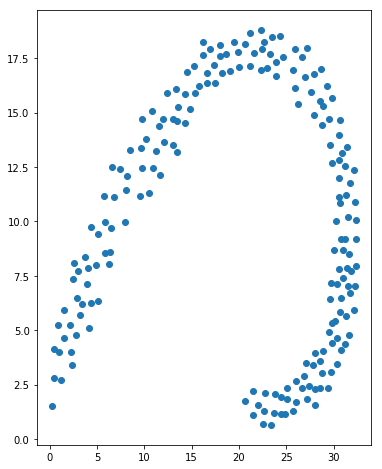

In [7]:
plt.figure(figsize = (6,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

==> Khi trực quan hóa dữ liệu, em thấy có thể chia dữ liệu ra 2 cụm, một cụm bên trái (x đi từ 0 đến khoảng 15), cụm còn lại là y đi từ 15 đến hơn 30

** Sử dụng KMeans để chia cụm

In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,8)

for k in K:
    model = KMeans(n_clusters=k).fit(data)
    distortions.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis = 1))/data.shape[0])

In [9]:
distortions

[11.20065674760658,
 6.611918139909799,
 4.670807159559653,
 3.605037388762533,
 2.9115144532510513,
 2.463202338915484,
 2.1899298048288087]

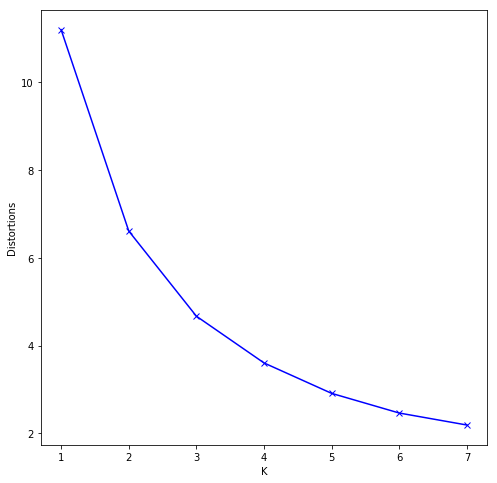

In [10]:
plt.figure(figsize = (8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortions')
plt.show()

** Using Silhouette method to determine the maximum optimal number of clusters:

In [11]:
from sklearn.metrics import silhouette_score

sil = []
K = range(2,8)

for k in K:
    model = KMeans(n_clusters=k).fit(data)
    labels = model.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))

In [12]:
sil

[0.5515342553888235,
 0.5379396413607955,
 0.5315253817742398,
 0.5264883445430188,
 0.5183532568848476,
 0.5022507867690453]

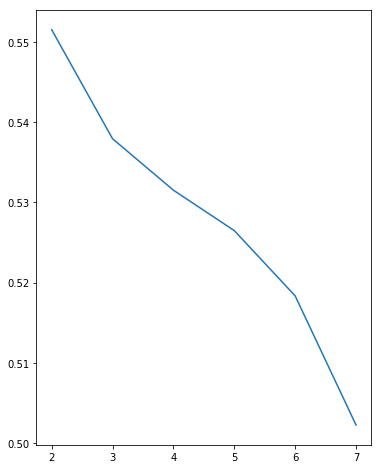

In [13]:
plt.figure(figsize = (6,8))
plt.plot(K, sil)
plt.show()

==> Dựa vào các bước trên, ta thấy nên chia dữ liệu ra 2 cụm vì nó cho giá trị silhouette score cao nhất, bởi vì silhouette score chỉ ra how similar a point to its own cluster compared to other cluster 

** Chia cụm:

In [14]:
model_1 = KMeans(n_clusters=2)
model_1.fit(data)

centroids = model_1.cluster_centers_
labels = model_1.labels_

print(centroids)
print(labels)

[[ 8.84615385 11.21666667]
 [27.55705128  9.3974359 ]]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [15]:
df = data
df['Group'] = pd.Series(labels)
df.head()

,0,1,Group
0,1.225,2.7,0
1,4.125,5.1,0
2,6.375,8.6,0
3,10.475,11.3,0
4,13.475,13.2,0


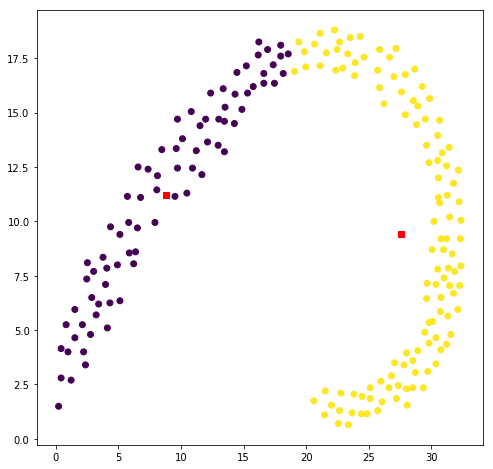

In [16]:
plt.figure(figsize = (8,8))
plt.scatter(centroids[:,0], centroids[:,1], marker = 's', color = 'red')
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.Group)
plt.show()

==> Giống như dự đoán ban đầu, em thấy dữ liệu được chia ra 2 cụm, một cụm với cột dữ liệu đầu dưới 17 và cụm còn lại thì lớn hơn 15. Một cụm thì có xu hướng x tăng, y tăng, cụm còn lại thì không như vậy.

** Thử với Heirarchical clustering:

In [17]:
data.iloc[:,:2].head()

,0,1
0,1.225,2.7
1,4.125,5.1
2,6.375,8.6
3,10.475,11.3
4,13.475,13.2


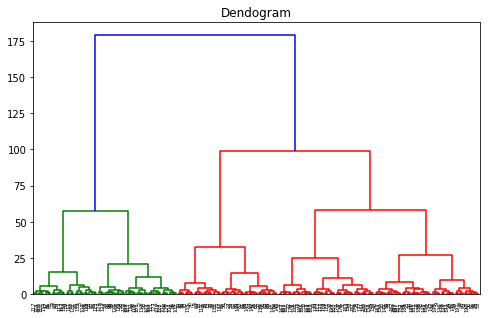

In [18]:
import scipy.cluster.hierarchy as hr

plt.figure(figsize = (8,5))
dend = hr.dendrogram(hr.linkage(data.iloc[:,:2], method = 'ward'))
plt.title('Dendogram')
plt.show()

==> Theo như suggest của dendrogram và cách phân cụm của KMeans, em chọn số cụm là 2, để xem có khác biệt gì không

In [19]:
from sklearn.cluster import AgglomerativeClustering
model_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'ward')
model_2.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [20]:
df = data
df['Group'] = pd.Series(model_2.labels_)
df.head()

,0,1,Group
0,1.225,2.7,1
1,4.125,5.1,1
2,6.375,8.6,1
3,10.475,11.3,1
4,13.475,13.2,1


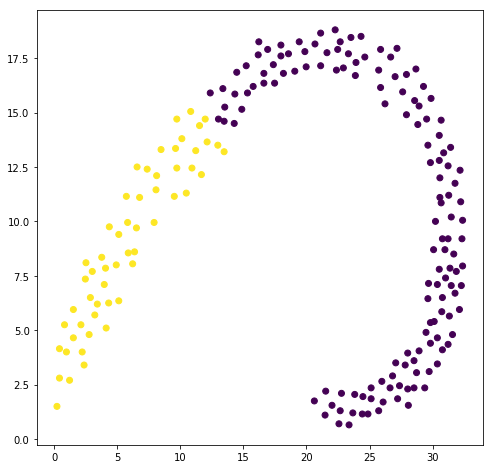

In [21]:
plt.figure(figsize = (8,8))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.Group)
plt.show()

==> Kết quả cũng phân ra 2 cụm, nhưng hơi khác so với thuật toán KMeans. Nên em sẽ chọn GMM để tiếp tục đánh giá

** Thử với GMM:

In [22]:
from sklearn.mixture import GaussianMixture
sil = []
K = range(2,8)

for k in K:
    model = GaussianMixture(n_components=k).fit(data.iloc[:,:2])
    labels = model.predict(data.iloc[:,:2])
    sil.append(silhouette_score(data.iloc[:,:2], labels))

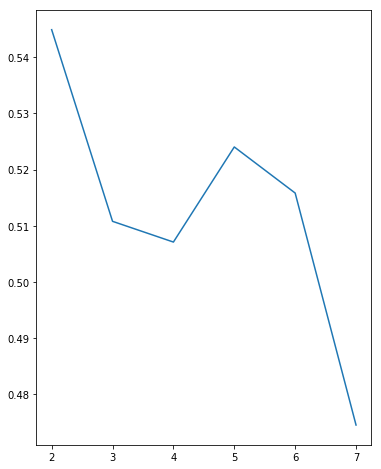

In [23]:
plt.figure(figsize = (6,8))
plt.plot(K, sil)
plt.show()

==> Ở thuật toán này cho silhouette score cao nhất ở 2.

In [24]:
gmm = GaussianMixture(n_components=2)
gmm.fit(data.iloc[:,:2])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [25]:
gmm.weights_

array([0.56017389, 0.43982611])

In [26]:
gmm.means_

array([[28.05175727,  8.79634526],
       [ 9.91034923, 11.81750046]])

In [27]:
gmm.covariances_

array([[[10.64301744,  0.18363944],
        [ 0.18363944, 34.35563526]],

       [[39.02234616, 28.61027001],
        [28.61027001, 23.1788183 ]]])

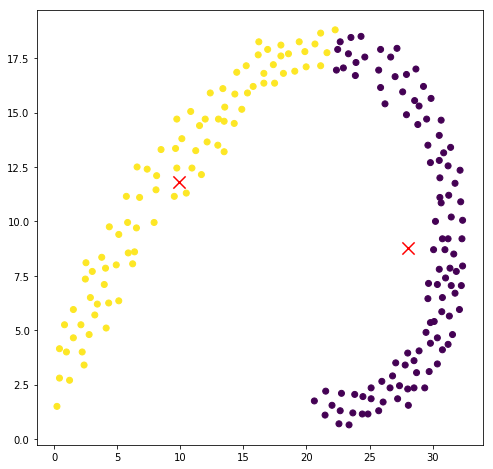

In [28]:
plt.figure(figsize = (8,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = gmm.predict(data.iloc[:,:2]))
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], color = 'red', marker = 'x', s = 150)
plt.show()

==> Với thuật toán GMM, ta thấy nó chia ra 2 cụm. 1 cụm bên trái, có x đi từ 0 đến gần 20, còn cụm còn lại nằm bên phải, có x lớn hơn 20

==> Tổng hợp các yếu tố đánh giá:
- Do dữ liệu hơi có dạng spherical nên KMeans và Heirarchical sẽ không hoạt động tốt bằng thuật toán GMM.
- Khi trực quan thì thấy cách chia cụm của GMM là hợp lý nhất, vì cụm đầu tiên, có x tăng thì y tăng, còn cụm còn lại thì không có xu hướng đó. Trong khi các thuật toán trước cũng chia ra 2 cụm nhưng không thể hiện rõ vấn đề này.

Nên em sẽ chọn dữ liệu được chia ra 2 cụm của thuật toán GMM

In [29]:
X_new = [[5.5, 9.5], [16.5, 15.5], [30.0, 10.0], [29.375, 3.0]]

Y_new = gmm.predict(X_new)

In [30]:
Y_new

array([1, 1, 0, 0], dtype=int32)

In [31]:
X_new = np.array(X_new)
X_new

array([[ 5.5  ,  9.5  ],
       [16.5  , 15.5  ],
       [30.   , 10.   ],
       [29.375,  3.   ]])

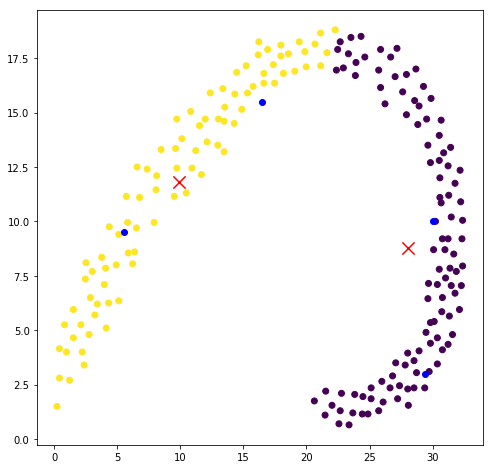

In [32]:
plt.figure(figsize = (8,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = gmm.predict(data.iloc[:,:2]))
plt.scatter(X_new[:,0], X_new[:,1], c = 'blue')
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], color = 'red', marker = 'x', s = 150)
plt.show()

==> Vậy 2 điểm dữ liệu đầu tiên trong X_new thuộc về cụm 1 (cụm vàng, x tăng y tăng), còn 2 điểm kia thuộc cụm 2 (cụm blue, không có xu hướng x, y)